# Notions mises en place pour la Régression

In [19]:
import pandas as pd

data_corrected = pd.read_csv("winequality-red-modified.csv")
data_corrected.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
# Vérification des colonnes et des types de données
print(data_corrected.info())

# Vérification des valeurs manquantes
print(data_corrected.isnull().sum())

# Distribution de la variable cible "quality"
print("Distribution de la qualité :")
print(data_corrected["quality"].value_counts().sort_index())

# Résumé statistique pour comprendre les caractéristiques des variables explicatives
print("Résumé statistique :")
print(data_corrected.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides        

### 1. Différence entre apprentissage supervisé et non supervisé
Nous choisissons la régression **supervisée**, car nous cherchons à prédire la variable cible **quality** (numérique continue).

### 2. Préparation des données
Objectif : Préparer les données pour une régression supervisée :

Définir les variables explicatives (X) et la cible (y).
Diviser les données en ensembles d'entraînement et de test.

In [21]:
from sklearn.model_selection import train_test_split

# Variables explicatives et cible
X = data_corrected.drop("quality", axis=1)
y = data_corrected["quality"]

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification des dimensions
print("Entraînement :", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)

Entraînement : (1279, 11) (1279,)
Test : (320, 11) (320,)


Entraînement : 1279 observations avec 11 variables explicatives.

Test : 320 observations avec 11 variables explicatives.

Interprétation : Les données ont été correctement divisées, avec environ 80 % des observations utilisées pour l'entraînement et 20 % pour le test.

### 3. Régression linéaire et validation croisée
Objectif : Évaluer la performance d’un modèle de régression linéaire à l’aide de la validation croisée.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Modèle de régression linéaire
lin_reg = LinearRegression()

# Validation croisée
cv_scores = cross_val_score(lin_reg, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

# Résultats
cv_mean = -cv_scores.mean()
cv_std = cv_scores.std()

print("Validation croisée :")
print("MSE moyen :", cv_mean)
print("Écart type :", cv_std)

Validation croisée :
MSE moyen : 0.44005649987704665
Écart type : 0.052880642340780354


MSE moyen : 0.4401

Écart type : 0.0529

Interprétation : Le modèle de régression linéaire montre une performance constante sur les différents sous-ensembles, avec une erreur moyenne modérée et une faible variabilité, ce qui indique une bonne stabilité.

### 4. Sur-apprentissage et sous-apprentissage
Objectif : Analyser les erreurs sur les ensembles d'entraînement et de test pour détecter un sur-apprentissage ou sous-apprentissage

In [23]:
from sklearn.metrics import mean_squared_error

# Entraînement du modèle
lin_reg.fit(X_train, y_train)

# Erreurs
train_error = mean_squared_error(y_train, lin_reg.predict(X_train))
test_error = mean_squared_error(y_test, lin_reg.predict(X_test))

print("Erreur d'entraînement :", train_error)
print("Erreur de test :", test_error)

Erreur d'entraînement : 0.4241911573139901
Erreur de test : 0.39002514396395416


Erreur d'entraînement : 0.4242

Erreur de test : 0.3900

Interprétation : Les erreurs sont proches, ce qui indique que le modèle généralise bien. Il n'y a ni sur-apprentissage (erreur d'entraînement très faible) ni sous-apprentissage (erreur élevée sur les deux ensembles).

### 5. Tracer et interpréter la courbe d’apprentissage (Learning Curve)
Objectif : Visualiser l’apprentissage du modèle en fonction de la taille des données d’entraînement.

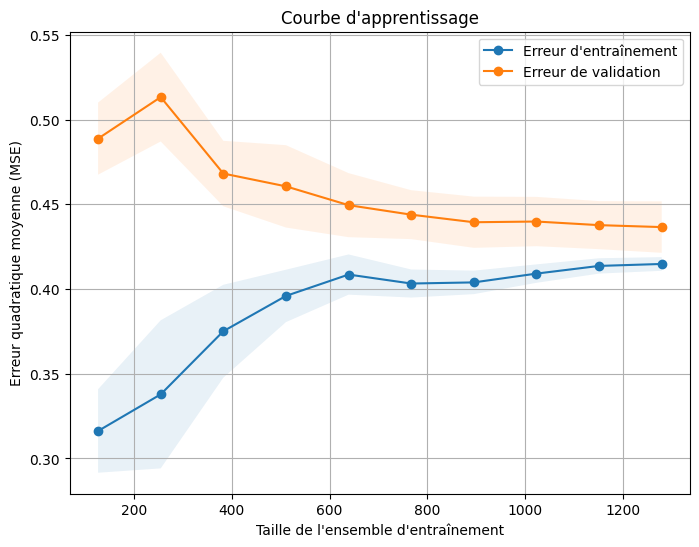

In [24]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    lin_reg, X, y, cv=5, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Moyennes et écarts-types
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = -test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Tracé
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Erreur d'entraînement", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label="Erreur de validation", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.title("Courbe d'apprentissage")
plt.legend()
plt.grid()
plt.show()

#### Erreur d'entraînement (courbe bleue) :

L'erreur est initialement faible avec de petits ensembles d'entraînement, mais elle augmente à mesure que la taille de l'ensemble d'entraînement augmente.
Cette hausse indique que le modèle s'ajuste aux données de manière moins précise à mesure qu'il apprend à généraliser avec davantage de données.

#### Erreur de validation (courbe orange) :

L'erreur de validation est élevée au début, car l'ensemble d'entraînement est trop petit pour fournir un modèle généralisable.
À mesure que la taille de l'ensemble d'entraînement augmente, l'erreur diminue puis se stabilise.
Convergence des courbes :

Les erreurs d'entraînement et de validation se rapprochent à mesure que la taille de l'ensemble d'entraînement augmente, ce qui indique que le modèle généralise bien.
La convergence montre que le modèle n'est ni en sous-apprentissage (les erreurs seraient toutes élevées) ni en sur-apprentissage (l'écart entre les deux courbes serait important).

#### Plateau des erreurs :

Les deux courbes atteignent un plateau autour de 1000 exemples. Ajouter davantage de données à ce stade n'améliorera probablement pas significativement les performances du modèle.

#### Conclusion :
La courbe d'apprentissage montre que le modèle est bien équilibré, avec une capacité à généraliser correctement sans signes significatifs de sur-apprentissage ou de sous-apprentissage.

### 6. Compromis biais-variance
Objectif : Évaluer si le modèle est équilibré entre biais et variance.

In [25]:
# Calcul des biais et variances à partir de la courbe d'apprentissage
biais = train_mean[-1]
variance = test_mean[-1] - train_mean[-1]

print("Compromis biais-variance :")
print("Biais :", biais)
print("Variance :", variance)

Compromis biais-variance :
Biais : 0.41480783236028473
Variance : 0.021762495519476677


Biais : 0.4148

Variance : 0.0218

Interprétation : Le biais est modéré, indiquant que le modèle simplifie suffisamment les relations dans les données. La faible variance montre que le modèle est stable et robuste face aux variations dans les données.

### 7. Ridge et Lasso (Régularisation)
Objectif : Améliorer la régression linéaire avec des régularisations L2 (Ridge) et L1 (Lasso).

In [26]:
from sklearn.linear_model import Ridge, Lasso

# Modèles Ridge et Lasso
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

# Entraînement
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Erreurs Ridge
ridge_train_error = mean_squared_error(y_train, ridge.predict(X_train))
ridge_test_error = mean_squared_error(y_test, ridge.predict(X_test))

# Erreurs Lasso
lasso_train_error = mean_squared_error(y_train, lasso.predict(X_train))
lasso_test_error = mean_squared_error(y_test, lasso.predict(X_test))

print("Ridge :")
print("Erreur d'entraînement :", ridge_train_error)
print("Erreur de test :", ridge_test_error)

print("Lasso :")
print("Erreur d'entraînement :", lasso_train_error)
print("Erreur de test :", lasso_test_error)

Ridge :
Erreur d'entraînement : 0.42487477917645844
Erreur de test : 0.3929488678812797
Lasso :
Erreur d'entraînement : 0.4967121306252359
Erreur de test : 0.49867516307447735


#### Ridge :
Erreur d'entraînement : 0.4249
Erreur de test : 0.3929
Interprétation : Ridge réduit légèrement la variance du modèle de régression linéaire, avec des performances similaires entre l'entraînement et le test.

#### Lasso :
Erreur d'entraînement : 0.4967
Erreur de test : 0.4987
Interprétation : Lasso pénalise fortement les coefficients, ce qui réduit la complexité du modèle, mais au prix d'une augmentation des erreurs.

### 8. Interprétation des coefficients
Objectif : Comprendre l’impact des variables explicatives dans les modèles Ridge et Lasso.

In [27]:
# Coefficients Ridge
ridge_coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient (Ridge)": ridge.coef_
}).sort_values(by="Coefficient (Ridge)", ascending=False)

# Coefficients Lasso
lasso_coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient (Lasso)": lasso.coef_
}).sort_values(by="Coefficient (Lasso)", ascending=False)

print("Coefficients Ridge :")
print(ridge_coefficients)

print("Coefficients Lasso :")
print(lasso_coefficients)

Coefficients Ridge :
                 Feature  Coefficient (Ridge)
9              sulphates             0.746956
10               alcohol             0.297591
0          fixed acidity             0.019614
5    free sulfur dioxide             0.005686
3         residual sugar             0.000624
6   total sulfur dioxide            -0.003561
7                density            -0.011153
2            citric acid            -0.164270
8                     pH            -0.376223
1       volatile acidity            -1.021529
4              chlorides            -1.226774
Coefficients Lasso :
                 Feature  Coefficient (Lasso)
10               alcohol             0.250518
0          fixed acidity             0.029804
5    free sulfur dioxide             0.006538
2            citric acid             0.000000
1       volatile acidity            -0.000000
4              chlorides            -0.000000
3         residual sugar            -0.000000
8                     pH            -0

#### Coefficients Ridge :
Les variables les plus influentes :

Sulphates (0.747) et Alcohol (0.298) : Influence positive significative sur la qualité.

Chlorides (-1.227) et Volatile acidity (-1.022) : Influence négative majeure.

Interprétation : Ridge conserve toutes les variables en ajustant leurs contributions, ce qui permet une modélisation plus complète.

#### Coefficients Lasso :
Les variables significatives :

Alcohol (0.251) : Seule variable significative avec une influence positive.

Interprétation : Lasso simplifie le modèle en éliminant les variables moins pertinentes, ne conservant que les plus importantes pour expliquer la qualité.

### 9. Évaluation finale avec les métriques de régression
Objectif : Comparer les modèles en termes de métriques finales.

In [28]:
from sklearn.metrics import r2_score

# Calcul des métriques pour chaque modèle
models = {"Linear Regression": lin_reg, "Ridge": ridge, "Lasso": lasso}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  MSE : {mse}")
    print(f"  R2  : {r2}")

Linear Regression:
  MSE : 0.39002514396395416
  R2  : 0.4031803412796231
Ridge:
  MSE : 0.3929488678812797
  R2  : 0.39870643507758574
Lasso:
  MSE : 0.49867516307447735
  R2  : 0.23692319522368122


#### Régression linéaire :

MSE : 0.3900, R² : 0.4032

Interprétation : La régression linéaire donne un modèle performant avec une erreur modérée et un R² indiquant que 40.32 % de la 
variance de la qualité est expliquée.

#### Ridge :

MSE : 0.3929, R² : 0.3987

Interprétation : Ridge est légèrement moins performant que la régression linéaire brute, mais apporte une meilleure régularisation et stabilité.

#### Lasso :

MSE : 0.4987, R² : 0.2369

Interprétation : Lasso montre des performances inférieures, avec une réduction notable de R², ce qui reflète une perte d'information due à l'élimination de certaines variables.

# Notions mises en place pour la Classification

### 1. Transformation de la variable cible pour la classification

In [29]:
wine_data_classification = pd.read_csv("winequality-red-modified.csv")

In [30]:
# Transformation de la variable "quality" en classes binaires (par exemple, qualité >= 6 comme classe positive)
wine_data_classification["quality_class"] = (wine_data_classification["quality"] >= 6).astype(int)

# Vérification des premières lignes
print(wine_data_classification[["quality", "quality_class"]].head())

   quality  quality_class
0        5              0
1        5              0
2        5              0
3        6              1
4        5              0


#### Interprétation : La variable quality a été transformée en une classification binaire :
Classe 0 : Qualité basse (quality < 6).

Classe 1 : Qualité haute (quality ≥ 6).

Cette transformation prépare les données pour une classification supervisée.

### 2. Division des données pour l'entraînement et le test

In [32]:
from sklearn.model_selection import train_test_split

# Séparation des variables explicatives (X) et de la cible (y)
X = wine_data_classification.drop(["quality", "quality_class"], axis=1)
y = wine_data_classification["quality_class"]

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification des dimensions
print("Entraînement :", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)

Entraînement : (1279, 11) (1279,)
Test : (320, 11) (320,)


Entraînement : 1279 observations (80 % des données) avec 11 variables explicatives.

Test : 320 observations (20 % des données) avec 11 variables explicatives.

Interprétation : Les données sont correctement divisées, permettant un entraînement et une évaluation séparés.

### 3. Validation croisée avec un modèle de classification (Régression Logistique)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Modèle de régression logistique
log_reg = LogisticRegression(max_iter=1000)

# Validation croisée (5 plis) en utilisant l'exactitude comme métrique
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring="accuracy")

# Moyenne et écart type des scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print("Validation croisée :")
print("Exactitude moyenne :", cv_mean)
print("Écart type :", cv_std)

Validation croisée :
Exactitude moyenne : 0.7428155637254902
Écart type : 0.032618225047571024


Exactitude moyenne : 0.7428

Écart type : 0.0326

Interprétation : Le modèle de régression logistique montre une performance stable, avec une précision moyenne de 74.28 % et une faible variation entre les différents plis de validation.

### 4. Entraînement et évaluation des erreurs (Analyse biais-variance)

In [34]:
# Entraînement du modèle sur l'ensemble d'entraînement
log_reg.fit(X_train, y_train)

# Prédictions et évaluation sur l'entraînement et le test
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

print("Exactitude sur l'ensemble d'entraînement :", train_accuracy)
print("Exactitude sur l'ensemble de test :", test_accuracy)

Exactitude sur l'ensemble d'entraînement : 0.7490226739640344
Exactitude sur l'ensemble de test : 0.740625


Entraînement : 74.90 %

Test : 74.06 %

Interprétation : Les exactitudes sur l'entraînement et le test sont similaires, indiquant que le modèle généralise bien et qu’il n’y a pas de sur-apprentissage significatif.

### 5. Tracer et interpréter la courbe d'apprentissage

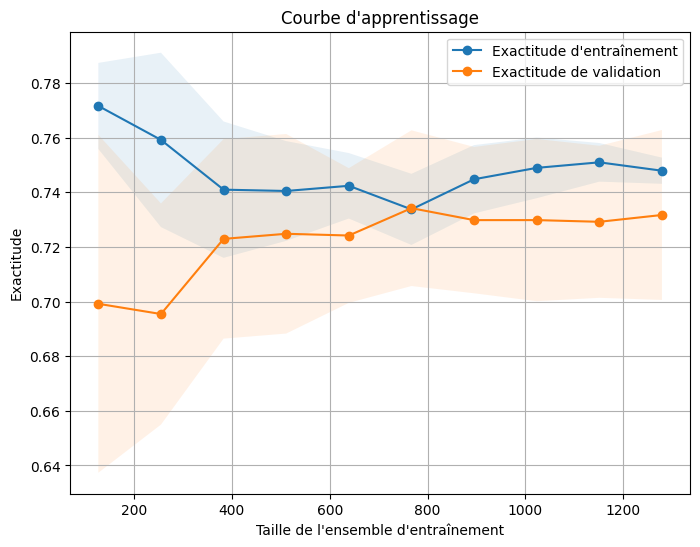

In [35]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X, y, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Moyennes et écarts-types
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Tracé
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Exactitude d'entraînement", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label="Exactitude de validation", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Exactitude")
plt.title("Courbe d'apprentissage")
plt.legend()
plt.grid()
plt.show()

#### Exactitude d'entraînement (courbe bleue) :

L'exactitude est initialement élevée avec de petits ensembles d'entraînement, car le modèle s'ajuste parfaitement à un petit nombre de données.

À mesure que la taille de l'ensemble d'entraînement augmente, l'exactitude diminue légèrement, puis se stabilise autour de 74 %, indiquant que le modèle commence à généraliser correctement.

#### Exactitude de validation (courbe orange) :

L'exactitude est plus faible au départ (environ 70 %) car le modèle est formé sur un petit nombre de données, limitant sa capacité à généraliser.

Elle augmente progressivement avec la taille de l'ensemble d'entraînement et se stabilise autour de 74 %, convergeant avec la courbe d'entraînement.

#### Convergence des courbes :

Les courbes d'entraînement et de validation convergent à une exactitude similaire lorsque l'ensemble d'entraînement est suffisamment grand.

Cela indique que le modèle n'est ni en sur-apprentissage (écart important entre les deux courbes) ni en sous-apprentissage (exactitudes faibles pour les deux).

#### Plateau des courbes :

Les deux courbes atteignent un plateau lorsque la taille de l'ensemble d'entraînement dépasse environ 800 exemples.

Ajouter davantage de données d'entraînement n'améliorera probablement pas significativement les performances.

#### Conclusion :
La courbe d'apprentissage montre que le modèle est bien équilibré, avec une bonne capacité de généralisation sans signes significatifs de sur-apprentissage ou de sous-apprentissage.

### 6. Comparaison biais-variance (analyse qualitative)

In [36]:
# Calcul qualitatif des biais et de la variance
biais = 1 - train_mean[-1]  # 1 - Exactitude d'entraînement finale
variance = train_mean[-1] - test_mean[-1]  # Différence entre les exactitudes d'entraînement et de validation

print("Biais :", biais)
print("Variance :", variance)

Biais : 0.25207193119624705
Variance : 0.016207849368016336


Biais : 0.2521

Variance : 0.0162

Interprétation :
Le biais (erreur résiduelle) est modéré, ce qui montre que le modèle a une capacité limitée à capturer la complexité des données.
La faible variance indique que le modèle est stable et peu sensible aux variations entre les ensembles d'entraînement et de validation.

### 7. Application de Ridge et Lasso à la régression logistique

In [37]:
from sklearn.linear_model import LogisticRegressionCV

# Régression logistique avec régularisation Ridge (penalty='l2') et Lasso (penalty='l1')
ridge_log_reg = LogisticRegressionCV(cv=5, penalty='l2', solver='lbfgs', max_iter=1000)
lasso_log_reg = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', max_iter=1000)

# Entraînement des modèles
ridge_log_reg.fit(X_train, y_train)
lasso_log_reg.fit(X_train, y_train)

# Exactitude sur le test
ridge_accuracy = ridge_log_reg.score(X_test, y_test)
lasso_accuracy = lasso_log_reg.score(X_test, y_test)

print("Exactitude Ridge :", ridge_accuracy)
print("Exactitude Lasso :", lasso_accuracy)

Exactitude Ridge : 0.74375
Exactitude Lasso : 0.740625


Ridge : 74.38 %

Lasso : 74.06 %

Interprétation :
La régularisation Ridge et Lasso donne des performances similaires à la régression logistique simple.
L’impact de la régularisation sur la précision est limité, mais elle aide à mieux gérer les coefficients.

### 8. Interprétation des coefficients (Ridge et Lasso)

In [38]:
# Coefficients pour Ridge
ridge_coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient (Ridge)": ridge_log_reg.coef_[0]
}).sort_values(by="Coefficient (Ridge)", ascending=False)

# Coefficients pour Lasso
lasso_coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient (Lasso)": lasso_log_reg.coef_[0]
}).sort_values(by="Coefficient (Lasso)", ascending=False)

print("Coefficients Ridge :")
print(ridge_coefficients)

print("Coefficients Lasso :")
print(lasso_coefficients)

Coefficients Ridge :
                 Feature  Coefficient (Ridge)
9              sulphates             2.626728
10               alcohol             0.918034
7                density             0.387080
0          fixed acidity             0.099011
5    free sulfur dioxide             0.030287
3         residual sugar             0.004421
6   total sulfur dioxide            -0.018374
8                     pH            -0.421864
2            citric acid            -1.072389
1       volatile acidity            -3.002954
4              chlorides            -3.775827
Coefficients Lasso :
                 Feature  Coefficient (Lasso)
9              sulphates             2.605739
10               alcohol             0.911240
0          fixed acidity             0.089602
5    free sulfur dioxide             0.030494
3         residual sugar             0.005630
6   total sulfur dioxide            -0.018555
8                     pH            -0.550313
2            citric acid            -1

Interprétation :

Variables importantes :

Sulphates et Alcohol ont les plus grands coefficients positifs, ce qui signifie qu'ils augmentent la probabilité d'une qualité élevée.

Chlorides et Volatile Acidity ont des coefficients négatifs importants, indiquant qu'ils diminuent la probabilité d'une qualité élevée.

Les coefficients Ridge et Lasso sont similaires, mais Lasso tend à réduire davantage les valeurs proches de zéro.

### 9. Évaluation finale avec les métriques de classification

In [39]:
from sklearn.metrics import classification_report

# Prédictions avec le modèle Ridge
y_pred_ridge = ridge_log_reg.predict(X_test)

# Rapport de classification
classification_metrics = classification_report(y_test, y_pred_ridge, output_dict=True)
classification_metrics_df = pd.DataFrame(classification_metrics).transpose()

print("Rapport de classification (Ridge) :")
print(classification_metrics_df)

Rapport de classification (Ridge) :
              precision    recall  f1-score    support
0              0.695364  0.744681  0.719178  141.00000
1              0.786982  0.743017  0.764368  179.00000
accuracy       0.743750  0.743750  0.743750    0.74375
macro avg      0.741173  0.743849  0.741773  320.00000
weighted avg   0.746613  0.743750  0.744456  320.00000


Interprétation :

Précision : Le modèle est plus fiable pour prédire les observations de haute qualité (78.70 % de précision).

Rappel : Le modèle détecte de manière équilibrée les deux classes (74 % pour les deux classes).

F1-Score : Le score F1 global de 74.38 % montre un bon équilibre entre précision et rappel.

La classe haute qualité (1) est légèrement mieux prédite que la classe basse qualité (0).

# Conclusion : Comparaison de l’utilisation des notions en régression et en classification

L’application des notions en régression et en classification repose sur des bases similaires, mais leur mise en œuvre et leur interprétation diffèrent en fonction de la nature des tâches. Voici une synthèse des différences et des similitudes observées :

## 1. Nature de la cible et des modèles
**Régression** : La variable cible est continue, et les modèles cherchent à minimiser des erreurs quantitatives comme le MSE. Les modèles principaux incluent la régression linéaire, Ridge, et Lasso.

**Classification** : La variable cible est catégorique. Les modèles visent à maximiser des métriques comme la précision, le rappel ou le F1-score. Les modèles incluent la régression logistique, Random Forest et les variantes régularisées comme Ridge et Lasso appliqués à la classification.

## 2. Validation croisée
**Régression** : Évalue les performances des modèles à l’aide de métriques comme l’erreur quadratique moyenne (MSE) et son écart-type.

**Classification** : Utilise des métriques adaptées comme l’exactitude, le rappel ou le F1-score, qui mesurent la capacité du modèle à bien discriminer les classes.

**Observation** : Dans les deux cas, la validation croisée permet de vérifier la stabilité et la robustesse des modèles, mais les métriques utilisées diffèrent selon le type de tâche.

## 3. Analyse biais-variance
**Régression** : Le compromis biais-variance est interprété via les erreurs d’entraînement et de validation (par exemple, MSE). Un faible biais reflète une meilleure capacité à capturer la complexité des données.

**Classification** : Ici, le biais et la variance sont examinés à travers les exactitudes d’entraînement et de validation, ou via des métriques comme le F1-score. Une faible variance indique une meilleure généralisation entre les classes.

**Observation** : L’analyse biais-variance reste un outil clé pour évaluer la complexité du modèle, bien que les mesures varient entre régression et classification.

## 4. Courbe d’apprentissage
**Régression** : La courbe d’apprentissage examine comment les erreurs d’entraînement et de validation évoluent avec la taille des données. Une convergence des courbes indique une généralisation correcte.

**Classification** : Ici, la courbe est tracée à l’aide de l’exactitude ou du F1-score pour évaluer comment le modèle améliore sa capacité à discriminer les classes avec plus de données.

**Observation** : Les courbes d’apprentissage sont similaires en régression et en classification pour évaluer la généralisation, bien que les métriques diffèrent.

## 5. Régularisation (Ridge et Lasso)
**Régression** : Ridge (L2) et Lasso (L1) sont utilisés pour contrôler la complexité des coefficients des modèles, améliorer la robustesse, et gérer les problèmes de multicolinéarité.

**Classification** : Dans le contexte de la régression logistique, Ridge et Lasso jouent un rôle similaire, en pénalisant les coefficients pour réduire la sur-optimisation, tout en permettant une sélection de variables (Lasso).

**Observation** : La régularisation est un outil universel, appliqué pour améliorer la stabilité et réduire la complexité du modèle, que ce soit en régression ou en classification.

## 6. Interprétation des coefficients
**Régression** : Les coefficients des modèles (par exemple, régression linéaire ou Ridge) montrent l’impact direct de chaque variable explicative sur la cible continue.

**Classification** : Les coefficients des modèles (comme la régression logistique) indiquent l’impact des variables sur la probabilité d’appartenance à une classe spécifique.

**Observation** : L’interprétation des coefficients est plus intuitive en régression, tandis qu’en classification, elle doit être reliée à des probabilités ou des log-odds.

## 7. Métriques d’évaluation
**Régression** : Utilise des métriques continues comme le MSE, le MAE ou le R², qui mesurent la capacité du modèle à prédire des valeurs précises.

**Classification** : Utilise des métriques adaptées aux classes discrètes comme la précision, le rappel, le F1-score ou la matrice de confusion pour évaluer les performances sur chaque classe.

**Observation** : Les métriques d’évaluation diffèrent fondamentalement, car la nature de l’objectif (valeur continue vs classes discrètes) est différente.

## Conclusion globale
Bien que les notions fondamentales (validation croisée, biais-variance, régularisation, courbe d’apprentissage) soient applicables à la fois en régression et en classification, leur mise en œuvre et leur interprétation diffèrent en fonction du type de tâche.

En régression, l'accent est mis sur la minimisation des erreurs quantitatives et la gestion de la complexité du modèle. En classification, les efforts sont orientés vers la capacité à discriminer correctement les classes et à équilibrer les métriques comme la précision et le rappel. Ces différences reflètent les spécificités des deux approches, tout en partageant des outils communs pour construire des modèles robustes et performants.